# Jamming Avoidance at a Point

In [1]:
import numpy as np
import scipy.signal as sps
import scipy.stats as st
import scipy.ndimage as img
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('white')

In [2]:
np.random.seed(0)

Create time vector

In [3]:
t = np.arange(0,0.2,1e-4)

EOD of fish 1

In [4]:
w1 = 264*(2*np.pi)
s1 = np.cos(w1*t)

EOD of fish 2

In [5]:
w2 = 244*(2*np.pi)
s2 = np.cos(w2*t)

Sum of signals

In [6]:
s = s1+s2
peaks,_ = sps.find_peaks(s)

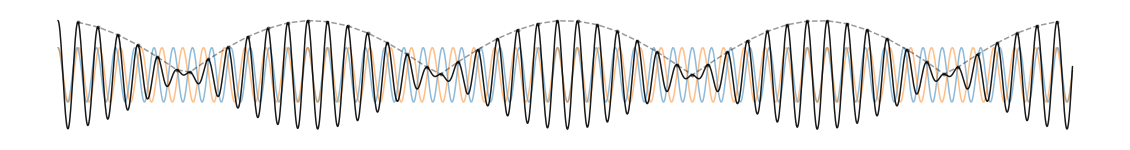

In [7]:
plt.figure(figsize=(20,2.5))
plt.plot(t,s1,alpha=0.5)
plt.plot(t,s2,alpha=0.5)
plt.plot(t,s,c = 'k',alpha=0.9);
plt.plot(t[peaks],s[peaks],'.--',c='k',alpha=0.4)
plt.ylim(-2.5,2.5)
#plt.savefig("interference.png",dpi=300,bbox_inches='tight') 
plt.axis("off")
plt.savefig("jar.png",dpi=300,bbox_inches='tight')

# Receptor firing in the presence and absence of JAR

In [8]:
t = np.arange(-0.1,0.5,1e-5)

Functions:

In [9]:
def signal_plot(t,s,T,tau,P,rho,lim=[0.1,0.4],save=False,filename=None):
    fig,ax = plt.subplots(5,1,figsize=(5,3.5))
    ax[0].plot(t,s, color = 'gray')
    ax[0].axhline(0,color='gray',alpha=0.5,linewidth=1)
    ax[1].eventplot(t[T], color = 'indigo',linewidths=0.5);
    ax[2].plot(t, tau, color = 'indigo'); ax[2].set_ylim([-0.001,0.008])
    ax[3].eventplot(t[P], color = 'seagreen',linewidths=0.5);
    ax[4].plot(t, rho, color = 'seagreen');  ax[4].set_ylim([-0.001,0.01])
    for i in range(5): 
        ax[i].set_xlim(lim)
        ax[i].axis('off')
    if save is True:
        plt.savefig(filename,dpi=500,bbox_inches="tight")
    plt.show()

In [10]:
#receptor firing
def receptors(s):
    T = sps.argrelmin(np.abs(s)); x = 0 if s[T[0][0]-1]<0 else 1
    T = T[0][x::2]
    P = np.where(np.random.rand(np.size(s))<(0.002*np.abs(s)))
    return T,P

In [11]:
#time averaging
def time_average(t,AP,sigma):
    fr = np.zeros(np.size(t)); fr[AP]=1
    fr = img.gaussian_filter1d(fr, sigma, mode='wrap')
    return fr

1. Single Fish

In [12]:
w = 250*(2*np.pi)
s = np.cos(w1*t)

In [13]:
T,P = receptors(s)

#time averaged signal
tau = time_average(t,T,500)
rho = time_average(t,P,1500)

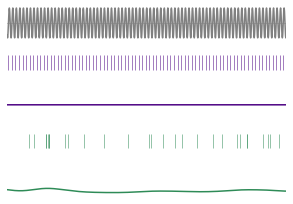

In [14]:
signal_plot(t,s,T,tau,P,rho,save=True,filename="receptor_properties_1_fish.png")

2. Double Fish

In [15]:
w1 = 250*(2*np.pi)
s1 = np.cos(w1*t)
w2 = 254*(2*np.pi)
s2 = np.cos(w2*t)

s = s1+s2

In [16]:
#firing pattern
T,P = receptors(s)

#time averaged signal
tau = time_average(t,T,500)
rho = time_average(t,P,1500)

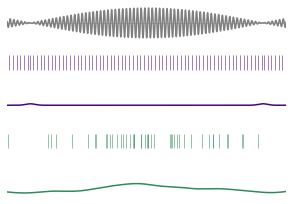

In [17]:
signal_plot(t,s,T,tau,P,rho,save=True,filename="receptor_properties_interference.png")

3. Double fish JARing

In [18]:
w1 = 240*(2*np.pi)
s1 = np.cos(w1*t)
w2 = 270*(2*np.pi)
s2 = np.cos(w2*t)

s = s1+s2

In [19]:
#firing pattern
T,P = receptors(s)

#time averaged signal
tau = time_average(t,T,500)
rho = time_average(t,P,1500)

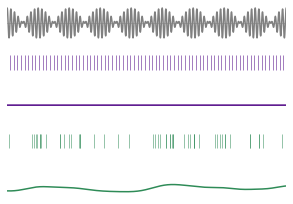

In [20]:
signal_plot(t,s,T,tau,P,rho,save=True,filename="receptor_properties_JAR.png")

## JAR Algorithm

Functions:

In [21]:
def waveform_plot(t,s_A,s_B,filename):
    fig,ax = plt.subplots(2,1,figsize=(10,2.5))
    ax[0].plot(t,s_A, color = 'firebrick')
    ax[0].plot(t,s_B, color = 'steelblue')
    ax[0].axis('off'); ax[1].axis('off');

    ax[1].eventplot(T_A,linewidth=1,color='firebrick')
    ax[1].eventplot(T_B,linewidth=1,color='steelblue');
    plt.savefig(filename,dpi=300,bbox_inches="tight")

In [22]:
def complex_plot(x,y,c,ab,filename):
    sns.set_context("talk")
    plt.figure(figsize = (5,5))
    
    sns.scatterplot(x=x,y=y,hue=np.arange(np.size(y)),palette=c,legend=False,alpha=0.8)
    plt.ylabel('|'+ab[0]+'|',fontsize=25)
    plt.xlabel('$\phi('+ab[0]+')- \phi('+ab[1]+')$',fontsize=25)
    
    sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0,1.5])
    
    plt.savefig(filename,dpi=300)
    sns.set_context("notebook")

In [23]:
t = np.arange(0.08,0.18,0.1e-6)

Frequency of self < Frequency of conspecific

In [24]:
w1 = 250*(2*np.pi)
s1 = np.cos(w1*t) #self signal
w2 = 254*(2*np.pi)
s2 = 0.5*np.cos(w2*t) #other signal (higher)

s3 = 0.01*np.cos(w2*t)

s_A = s1+s2
s_B = s1+s3

T_A,_ = receptors(s_A)
T_B,_ = receptors(s_B)

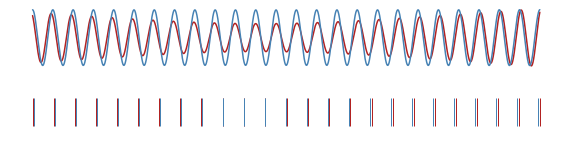

In [25]:
waveform_plot(t,s_A,s_B,filename="phase_delay_faster_fish_2.png")

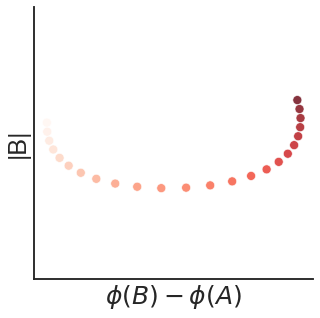

In [26]:
H_A_B = (T_A-T_B)*0.0001
S_A = s_A[sps.argrelmax(s_A)]
complex_plot(H_A_B[:-1],S_A,'Reds','BA','f1<f2_B_vote.png')

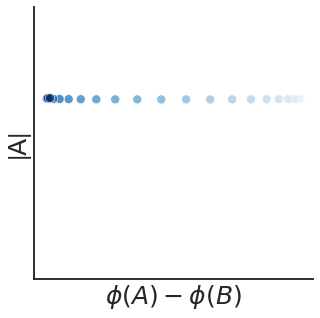

In [27]:
H_B_A = (T_B-T_A)*0.0001
S_B = s_B[sps.argrelmax(s_B)]
complex_plot(H_B_A[:-1],S_B,'Blues','AB','f1<f2_A_vote.png')

Frequency of self > Frequency of conspecific

In [28]:
w1 = 254*(2*np.pi)
s1 = np.cos(w1*t) #self signal
w2 = 250*(2*np.pi)
s2 = 0.5*np.cos(w2*t) #other signal (lower)

s3 = 0.01*np.cos(w2*t)

s_A = s1+s2
s_B = s1+s3

T_A,_ = receptors(s_A)
T_B,_ = receptors(s_B)

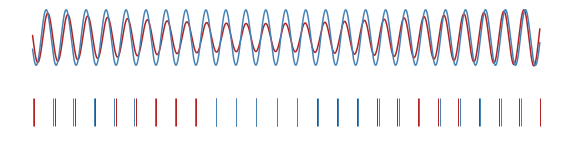

In [29]:
waveform_plot(t,s_A,s_B,filename="phase_delay_slower_fish_2.png")

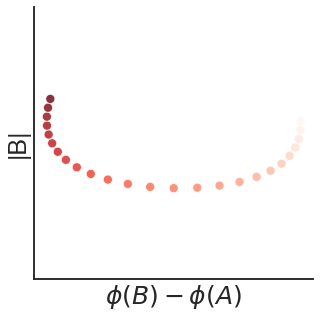

In [30]:
H_A_B = (T_A[:-1]-T_B)*0.0001
S_A = s_A[sps.argrelmax(s_A)]
complex_plot(H_A_B,S_A,'Reds','BA','f1>f2_B_vote.png')

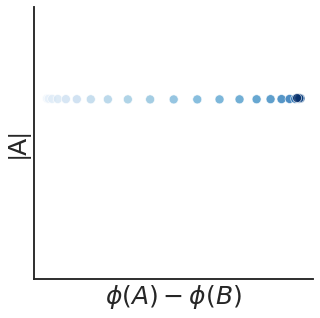

In [31]:
H_B_A = (T_B-T_A[:-1])*0.0001
S_B = s_B[sps.argrelmax(s_B)]
complex_plot(H_B_A,S_B,'Blues','AB','f1>f2_A_vote.png')